### Student Information
Name: 許暐彤 Hsu, Wei-tung

Student ID: 110061542

GitHub ID: Victoria-Wei

Kaggle name: Wei-tungHsu

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [2]:
### Begin Assignment Here

## First: take home exercises

In [3]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("data/train_df.pkl")
test_df = pd.read_pickle("data/test_df.pkl")

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


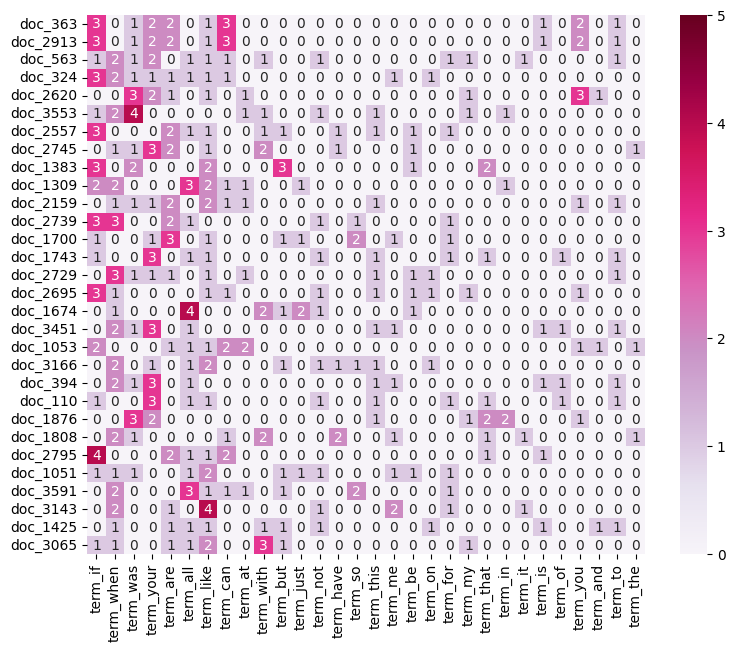

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for training set
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df.text)

ocur_times_word = np.sum(X_counts[:, :].toarray(), axis=0)                   # occuring times of words
sort_idx_word = np.argsort(ocur_times_word)                                  # sort by values, and store the indexes

ocur_times_file = np.sum(X_counts[:, sort_idx_word[-30:]].toarray(), axis=1) # occuring times of 30 most frequently used words for each file
sort_idx_file = np.argsort(ocur_times_file)                                  # sort by values, and store the indexes

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[sort_idx_word[-30:]]]
plot_y = ["doc_"+ str(i) for i in np.array(train_df.index)[sort_idx_file[-30:]]]
plot_z = np.zeros((30, 30))
for i in range(30):         # (y, x)
    for j in range(30):
        plot_z[i, j] = X_counts[sort_idx_file[-(i+1)], sort_idx_word[-(j+1)]]
    
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

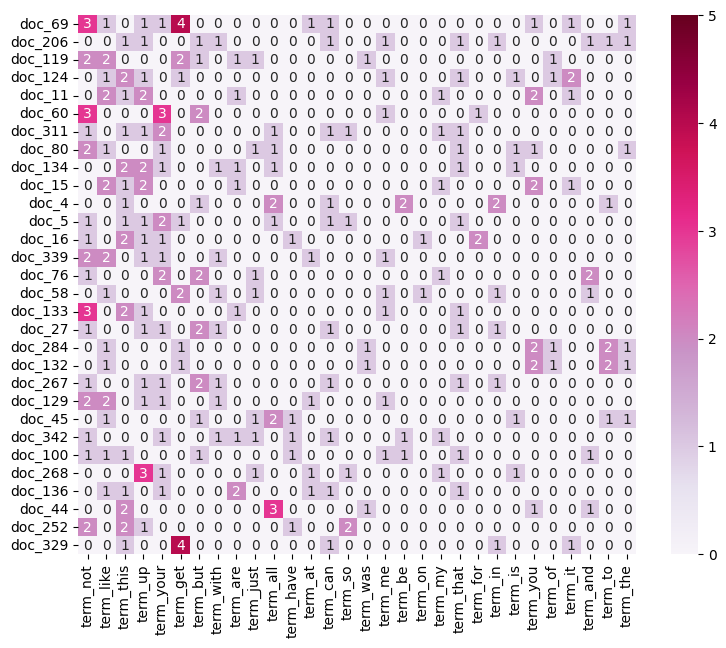

In [5]:
# for testing set
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(test_df.text)

ocur_times_word = np.sum(X_counts[:, :].toarray(), axis=0)                   # occuring times of words
sort_idx_word = np.argsort(ocur_times_word)                                  # sort by values, and store the indexes

ocur_times_file = np.sum(X_counts[:, sort_idx_word[-30:]].toarray(), axis=1) # occuring times of 30 most frequently used words for each file
sort_idx_file = np.argsort(ocur_times_file)                                  # sort by values, and store the indexes

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[sort_idx_word[-30:]]]
plot_y = ["doc_"+ str(i) for i in np.array(test_df.index)[sort_idx_file[-30:]]]
plot_z = np.zeros((30, 30))
for i in range(30):         # (y, x)
    for j in range(30):
        plot_z[i, j] = X_counts[sort_idx_file[-(i+1)], sort_idx_word[-(j+1)]]
    
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(max_features=1000)
tf_idf_scores = vectoriser.fit_transform(train_df["text"])
feature_names_1000 = vectoriser.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results below? What do they mean?

In [8]:
import nltk
nltk.download('punkt')
from sklearn.tree import DecisionTreeClassifier

# build analyzers (bag-of-words)
# use different tokenizer, choose most-shown words
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [9]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [10]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd' # int, 'f' for float
    thresh = cm.max() / 2. # threshold for color band(?
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

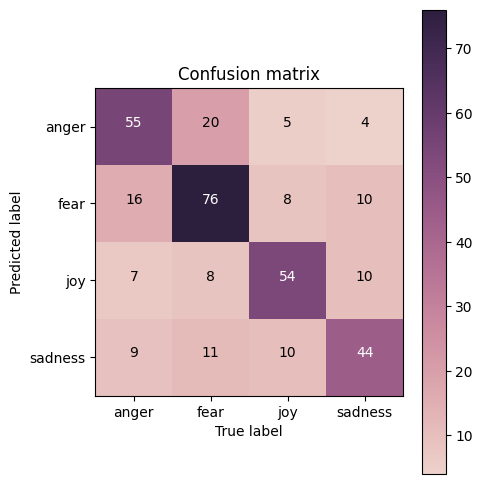

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

We first see that the model performs well on training set, while failing to perform the same in testing set. Overfitting might happened. This can be avoided by setting a smaller max depth for decision tree. Moreover, in confusion matrix, we can see that fear and anger are the most confusing for this model. It misclassifies anger as fear and fear as anger most often among all the other misclassifications.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

training accuracy: 0.79
testing accuracy: 0.7


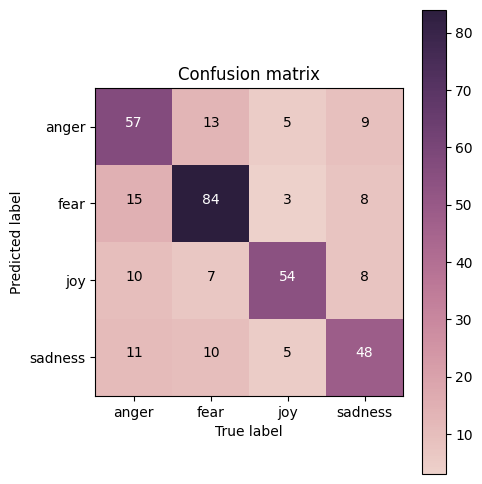

In [12]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)                                 # train model

y_train_pred = bnb.predict(X_train)                       # predict training set
y_test_pred = bnb.predict(X_test)                         # predict testing set

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.61      0.68      0.64        84
        fear       0.74      0.76      0.75       110
         joy       0.81      0.68      0.74        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.71      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Decision Tree model results in better accuracy in training set than Naive Bayes model. However, latter is more generalized to the dataset, as it performs similarly well on unseen testing set.

We learnt that Decision Trees has the disadvantage of suffering from overfitting, especially when the tree is large. Overfitting happened in this case, resulting in high performance for training set and poor one for testing set.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [14]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train) # to one-hot
y_test = label_encode(label_encoder, y_test)

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  500
output_shape:  4
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)        

In [15]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv') # save training results

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\user\anaconda3\envs\data_mining\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 4s 10ms/step - loss: 1.3391 - accuracy: 0.3651 - val_loss: 1.2667 - val_accuracy: 0.4524
Epoch 2/25
113/113 [==============================] - 1s 9ms/step - loss: 1.0057 - accuracy: 0.6424 - val_loss: 0.9058 - val_accuracy: 0.6484
Epoch 3/25
113/113 [==============================] - 1s 8ms/step - loss: 0.5926 - accuracy: 0.7874 - val_loss: 0.7564 - val_accuracy: 0.6888
Epoch 4/25
113/113 [==============================] - 1s 8ms/step - loss: 0.4155 - accuracy: 0.8469 - val_loss: 0.7917 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 1s 8ms/step - loss: 0.3352 - accuracy: 0.8724 - val_loss: 0.8235 - val_accuracy: 0.6974
Epoch 6/25
113/113 [==============================] - 1s 9ms/step - loss: 0.2737 - accuracy: 0.9070 - val_loss: 0.8253 - val_accuracy: 0.6859
Epoch 7/25
113/113 [==============================] - 1s 8ms/step - loss: 0.2245 - accuracy: 0.9214 - val_loss: 0.9145 - val_accuracy: 0.6859
Epoch 8/25
113/1

In [16]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.365071,1.339085,0.452450,1.266711
1,1,0.642402,1.005711,0.648415,0.905800
2,2,0.787434,0.592642,0.688761,0.756368
3,3,0.846942,0.415530,0.688761,0.791714
4,4,0.872405,0.335167,0.697406,0.823485
5,5,0.907003,0.273697,0.685879,0.825306
6,6,0.921395,0.224543,0.685879,0.914546
7,7,0.939109,0.187555,0.691643,0.959013
8,8,0.948519,0.162684,0.671470,1.021697
9,9,0.959314,0.136398,0.688761,1.088609


Text(0.5, 1.0, 'Loss')

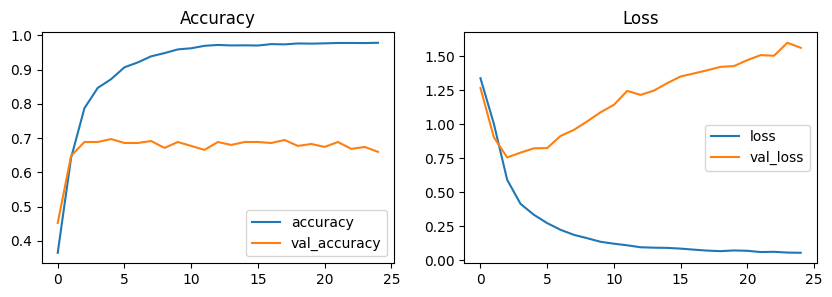

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

training_log["accuracy"].plot(ax=axes[0])
training_log["val_accuracy"].plot(ax=axes[0])
training_log["loss"].plot(ax=axes[1])
training_log["val_loss"].plot(ax=axes[1])
axes[0].legend()
axes[1].legend()
axes[0].set_title("Accuracy")
axes[1].set_title("Loss")

We see that validation accuracy stops improving at around epoch = 3. At the same time, loss for validation set starts to grow. This is the indication showing that our model overfitted at epoch = 3.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

We can average these word vectors to generate "sentence" vector for each file.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [18]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "./GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [19]:
from sklearn.manifold import TSNE

word_list = ["angry", "happy", "sad", "fear"]
topn = 15
target_words = []
for wd in word_list:
    target_words += [wd] + [word_ for word_, sim_ in w2v_google_model.most_similar(wd, topn=topn)]
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

C:\Users\user\anaconda3\envs\data_mining\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\envs\data_mining\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


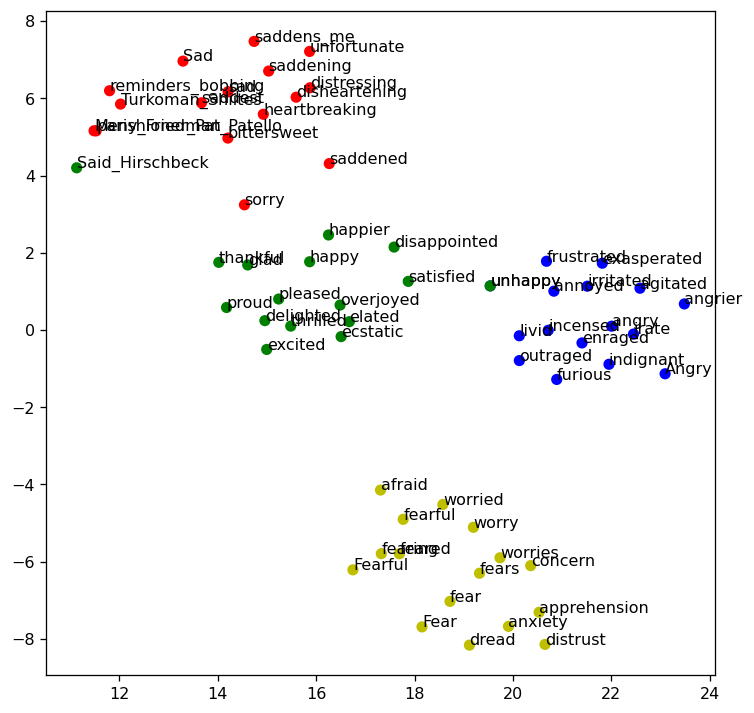

In [20]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Second & Third: Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework)

### Beforehand Pre-processing
The following pre-processings are done beforehand, by running `python pre_processing.py` in the terminal. Code in pre_processing.py is shown in the following cell.
- Read the given dataset to csv
- Add in additional data to help
    - [Emotion Detection from Text](https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text): tweet_emotions.csv
    - [Text-Emotion-detection](https://www.kaggle.com/datasets/chandrug/textemotiondetection?select=val.txt)：(train, test, val).txt
    - [Text Emotions Detection](https://www.kaggle.com/code/jarvis11/text-emotions-detection/data): text.txt

In [1]:
import pandas as pd
from csv import DictWriter

import json

# read dataset
def readData(path = './kaggle dataset/tweets_DM.json'):
    file = open(path, 'r', encoding='utf-8')
    data = []
    for line in file.readlines():
        dic = json.loads(line)
        data.append(dic)                                                            # turn json into list of dict
    return data

def saveCSV(file_path, data_df, first):
    if first == 1:
        data_df.to_csv(file_path, index=False)                                      # store 1st sample with header
    else:
        data_df.to_csv(file_path, mode='a', index=False, header=False)              # append to old csv

def pre_processing(data):
    id2train_test = pd.read_csv('./kaggle dataset/data_identification.csv', header=None, index_col=0, squeeze=True).to_dict()
                                                                                    # dict to separate training & testing
    id2label = pd.read_csv('./kaggle dataset/emotion.csv', header=None, index_col=0, squeeze=True).to_dict()
                                                                                    # dict to assign label for training set
    train_num = 0                                                                   # number of training sample
    test_num = 0                                                                    # number of testing sample
    for i in range(len(data)):                                                      # for every sample
        print("\r ", (i+1)*100 / len(data), "%% done                        ", end = '', flush = True)
        score = data[i]["_score"]
        index = data[i]["_index"]
        source_dic = data[i]["_source"]["tweet"]                                    # data type: dic
        hashtags = source_dic["hashtags"]                                           # data type: list

        tweet_id = source_dic["tweet_id"]
        text = source_dic["text"]                                                   # data type: str
        date = data[i]["_crawldate"]
        _type = data[i]["_type"]

        if id2train_test[tweet_id] == "train":                                      # for training sample
            train_num += 1                                                          # count number
            label = id2label[tweet_id]                                              # get label

            train_df = pd.DataFrame(
            [[tweet_id, text, label]], 
            columns=['tweet_id', 'text', 'label']
            )                                                                       # store id, text, and label
            saveCSV("./kaggle dataset/train_base.csv", train_df, train_num)         # save to csv file
  
        elif id2train_test[tweet_id] == "test":                                     # for testing sample
            test_num += 1                                                           # count number

            test_df = pd.DataFrame(
            [[tweet_id, text]], 
            columns=['id', 'text']
            )                                                                       # store id and text
            saveCSV("./kaggle dataset/test.csv", test_df, test_num)                 # save to csv file

    print("Total ", train_num, " training samples, and ", test_num, " testing samples.")
    
def read_data(file):
    data = []
    with open(file, 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())                # get label
            text = line[line.find("]")+1:].strip()                                  # get text
            data.append([label, text])                                              # put into list
    return data

def convert_label(item, name):                                                      # from one-hot to label
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

def add_data():
    # our training set has [joy, anticipation, trust, sadness, disgust, fear, surprise, anger] 8 classes
    train_df = pd.read_csv("./kaggle dataset/train_base.csv",lineterminator='\n')
    
    # 1. 'tweet_emotions' dataset
    # https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text
    # it has [neutral, worry, happiness, sadness, love, surprise, fun, relief, hate, empty, 
    # enthusiasm, boredom, anger] 13 classes
    tweet_emotions_df = pd.read_csv("./kaggle dataset/additional/tweet_emotions.csv")
    
    result_df = tweet_emotions_df[tweet_emotions_df["sentiment"] == "happiness"]
    result_df = result_df.rename(columns={'sentiment': 'label', 'content': 'text'}) # change col name
    result_df["label"] = "joy"                                                      # view happiness as joy
    
    emotion_lst = ["sadness", "surprise", "anger"]                                  # select emotions same as ours
    for emotion in emotion_lst:
        sub_df = tweet_emotions_df[tweet_emotions_df["sentiment"] == emotion]
        sub_df = sub_df.rename(columns={'sentiment': 'label', 'content': 'text'})   # change col name
        sub_df["label"] = emotion                                                   # assign emotion
        result_df = pd.concat([result_df, sub_df], axis=0)                          # join as 1 dataframe
    train_df = pd.concat([train_df, result_df], axis=0)                             # add to train_df
    
    # 2. train.txt, val.txt, test.txt
    # https://www.kaggle.com/code/chandrug/text-emotion-classification-neural-network
    # it has [joy, sadness, anger, fear, love, surprise] 6 class

    file_lst = ["train", "test", "val"]
    x = []
    y = []
    for file in file_lst:
        f = open('./kaggle dataset/additional/' + file + '.txt','r')

        for i in f:
            l = i.split(';')
            y.append(l[1].strip())                                                  # sum train, test, val as 1
            x.append(l[0])                                                          # sum train, test, val as 1
    data_df =pd.DataFrame({'text':x,'label':y})                                     # to dataframe
    
    result_df = pd.DataFrame()
    emotion_lst = ["joy", "sadness", "fear", "surprise", "anger"]                   # select emotions same as ours
    for emotion in emotion_lst:
        sub_df = data_df[data_df["label"] == emotion]
        result_df = pd.concat([result_df, sub_df], axis=0)
    train_df = pd.concat([train_df, result_df], axis=0)                             # add to train_df
    
    # 3. text.txt
    # https://www.kaggle.com/code/jarvis11/text-emotions-detection/notebook
    # it has ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"] 7 classes
    file = './kaggle dataset/additional/text.txt'
    data = read_data(file)
    
    emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
    X_all = []
    y_all = []
    for label, text in data:
        y_all.append(convert_label(label, emotions))                                # store labels
        X_all.append(text)                                                          # store text
    text_df = pd.DataFrame({'text':X_all,'label':y_all})                            # to dataframe
    
    result_df = pd.DataFrame()
    emotion_lst = ["joy", "sadness", "fear", "disgust", "anger"]                    # select emotions same as ours
    for emotion in emotion_lst:
        sub_df = text_df[text_df["label"] == emotion]
        result_df = pd.concat([result_df, sub_df], axis=0)
    train_df = pd.concat([train_df, result_df], axis=0)                             # add to train_df
    train_df.to_csv("./kaggle dataset/train_all.csv", index=False)
    
#data = readData()                                                                   # Read the given dataset
#pre_processing(data)                                                                # to csv
#add_data()                                                                          # Add in additional data to help
#print("Pre_processing done.Training data in './kaggle dataset/train_all.csv', and testing data in './kaggle dataset/test.csv'.")

### Baseline Model: SVM
#### Data Pre-processing
The following pre-processings are done here, by running the following cells.
- Check null & duplications
- Balance data distribution
- Generate usefull feature set for downstream task
    - Use GoogleNews-vectors-negative300 to generate 300d vector for each word
    - Average over words to get sentence vector
- Split training set into training and validation set
- Perform normalization on feature set
- Use PCA to reduce feature dimension


In [ ]:
import pandas as pd
## load csv file
train_df = pd.read_csv("./kaggle dataset/train_all.csv",lineterminator='\n')
test_df = pd.read_csv("./kaggle dataset/test.csv",lineterminator='\n')

In [ ]:
train_df.isnull().sum()                   # check null

tweet_id    0
text        0
label       0
dtype: int64

In [ ]:
train_df.duplicated().sum()               # check duplicated

0

In [ ]:
train_df["label"].value_counts()          # see data dist.

joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: label, dtype: int64

In [ ]:
# data balancing: undersample to 39867
# since adding data helps little when using svm
emotion_lst = ["joy", "anticipation", "trust", "sadness", "disgust", "fear", "surprise", "anger"]
result_df = pd.DataFrame()
for emotion in emotion_lst:
    sub_df = train_df[train_df['label'] == emotion]
    if len(sub_df) < 39867:
        sub_df = sub_df.sample(39867, replace=True)
    else:
        sub_df = sub_df.sample(39867)

    result_df = pd.concat([result_df, sub_df], axis=0)

train_df = result_df
result_df["label"].value_counts()

joy             39867
anticipation    39867
trust           39867
sadness         39867
disgust         39867
fear            39867
surprise        39867
anger           39867
Name: label, dtype: int64

In [ ]:
import numpy as np
def senVec(text_tokenized, w2v_model):
    embeddings = 0
    j = 0
    for i in range(len(text_tokenized)):                          # for each word
        if text_tokenized[i] in w2v_model.key_to_index :          # if in w2v_model
            embeddings += w2v_model[text_tokenized[i]]            # get word embedding
            j += 1
    if j == 0:                                                    # no existing word
        embeddings = np.zeros(300)                                # all zero
    else:
        embeddings = embeddings / j                               # average to get sentence embedding
    return embeddings

In [ ]:
from gensim.models import KeyedVectors
model_path = "./GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print("w2v model loaded")

w2v model loaded


In [ ]:
import nltk
#nltk.download('punkt')
def text2vec(text, w2v_model):
    text_tokenized = nltk.word_tokenize(text)                     # split words
    text_embeddings = senVec(text_tokenized, w2v_model)           # to sentence embedding
    return text_embeddings
    
train_df['text_emb'] = train_df.apply (lambda row: text2vec(row["text"], w2v_google_model), axis=1)
test_df['text_emb'] = test_df.apply (lambda row: text2vec(row["text"], w2v_google_model), axis=1)

In [ ]:
test_df.head()

,id,text,text_emb
0,0x28b412,"Confident of your obedience, I write to you, k...","[0.01792769, -0.016476719, 0.047608115, 0.1222..."
1,0x2de201,"""Trust is not the same as faith. A friend is s...","[0.03582881, -0.0007523757, 0.0917734, 0.08696..."
2,0x218443,When do you have enough ? When are you satisfi...,"[0.038360596, 0.014185588, 0.06351217, 0.11191..."
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...","[0.002085368, -0.0053507485, 0.06939697, 0.047..."
4,0x26289a,"In these tough times, who do YOU turn to as yo...","[-0.009007045, 0.09928676, 0.071650915, 0.1464..."


In [ ]:
train_df.head()

,tweet_id,text,label,text_emb
964236,0x2ab10a,"@MigsCloudChaser Yes, leave your Sentra under ...",joy,"[-0.0041760895, 0.04516672, 0.09581234, 0.1425..."
399655,0x2580fd,I #AM #Smiling now as I #Quickly #Write. & #Ty...,joy,"[-0.062139336, -0.04435314, 0.04444469, 0.0575..."
368592,0x30dadd,@gwen1173 U tooo gwen with <LH> #INDIA,joy,"[-0.12394884, -0.046657987, 0.08326551, 0.1738..."
1178274,0x238e27,Happiness isn't a future event but being compl...,joy,"[0.024607783, 0.013441003, 0.030403469, 0.0909..."
1100804,0x1fa31b,“Winning isn't everything but wanting to win i...,joy,"[-0.025470935, -0.012960333, 0.018891986, 0.00..."


In [ ]:
# all training data
X = train_df["text_emb"].values.tolist()
y = train_df["label"].values.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)                                  # fit scaler on training data
# apply transform
X_train_std = scaler.transform(X_train)
X_dev_std = scaler.transform(X_dev)
X_test_std = scaler.transform(test_df["text_emb"].values.tolist())

In [ ]:
from sklearn.decomposition import PCA
num_classes = 8

# run PCA
pca = PCA(n_components = num_classes - 1)
pca.fit(X_train_std)                                 # fit on training data
print(pca.explained_variance_ratio_)

# apply transform
X_train_pca = pca.transform(X_train_std)
X_dev_pca = pca.transform(X_dev_std)
X_test_pca = pca.transform(X_test_std)

[0.15267167 0.07924642 0.06334247 0.03947444 0.03513698 0.03149797
 0.02223136]


#### Model: SVM

In [ ]:
from sklearn import svm
# this takes a lot of time to train!!!!!!!!!
model = svm.SVC()
model.fit(X_train_pca, y_train)

SVC()

In [ ]:
from sklearn.metrics import f1_score
# see f1 on dev set
y_dev_pred = model.predict(X_dev_pca)
f1_dev = f1_score(y_true=y_dev, y_pred=y_dev_pred, average='macro')
f1_dev

0.25224644886611636

In [ ]:
# predict on testing set & save as csv
y_test_pred = model.predict(X_test_pca)
result_df = pd.DataFrame()
result_df["id"] = test_df["id"].values.tolist()
result_df["emotion"] = y_test_pred

result_df.to_csv("./kaggle dataset/submission/std_pca_SVM.csv", index=False)

,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,anticipation
3,0x2939d5,surprise
4,0x26289a,anticipation


### Final Model: NN
#### Pre-processing
The following pre-processings are done here, by running the following cells.
- Check null & duplications (checked above)
- Generate usefull feature set for downstream task
    - Use GoogleNews-vectors-negative300 to generate 300d vector for each word
    - Average over words to get sentence vector
    - Add cosine similarities and distances between sentence vector and each emotion's word vector as additional features
- Split training set into training and validation set
- Encode labels as one-hot

In [1]:
from gensim.models import KeyedVectors
model_path = "./GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print("w2v model loaded")

w2v model loaded


In [2]:
import pandas as pd
## load csv file
train_df = pd.read_csv("./kaggle dataset/train_all.csv",lineterminator='\n')
test_df = pd.read_csv("./kaggle dataset/test.csv",lineterminator='\n')

In [3]:
import nltk
#nltk.download('punkt')
import numpy as np
from scipy.linalg import norm

def senVec(text_tokenized, w2v_model):
    embeddings = 0
    j = 0
    for i in range(len(text_tokenized)):                          # for each word
        if text_tokenized[i] in w2v_model.key_to_index :          # if in w2v_model
            embeddings += w2v_model[text_tokenized[i]]            # get word embedding
            j += 1
    if j == 0:                                                    # no existing word
        embeddings = np.zeros(300)                                # all zero
    else:
        embeddings = embeddings / j                               # average to get sentence embedding
    return embeddings

def text2vec(text, w2v_model):
    text_tokenized = nltk.word_tokenize(text)                     # split words
    text_embeddings = senVec(text_tokenized, w2v_model)           # to sentence embedding
    
    emotion_lst = ["joy", "anticipation", "trust", "sadness", "disgust", "fear", "surprise", "anger"]

    similar_emb = []
    for emotion in emotion_lst:                                   # for each emotion
        emo_emb = w2v_model[emotion]                              # get emb. from w2v_model
        
        cosine = np.dot(text_embeddings,emo_emb)/(norm(text_embeddings)*norm(emo_emb))  
                                                                  # cosine similarity
        dis = ((text_embeddings - emo_emb)**2).sum()**(1/2)       # distance of 2 vector
        similar_emb.extend([cosine] + [dis])
        
    return list(text_embeddings) + list(similar_emb)              # 300d + 16d


train_df['text_emb'] = train_df.apply (lambda row: text2vec(row["text"], w2v_google_model), axis=1)
test_df['text_emb'] = test_df.apply (lambda row: text2vec(row["text"], w2v_google_model), axis=1)

[nltk_data] Downloading package punkt to /home/weitung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from sklearn.model_selection import train_test_split

# all training data
X = train_df["text_emb"].values.tolist()
y = train_df["label"].values.tolist()

X_test = test_df["text_emb"].values.tolist()

# split into training and validation set
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax


label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train) # to one-hot
y_dev = label_encode(label_encoder, y_dev)

2022-11-25 20:38:34.498407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 20:38:35.466211: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-25 20:38:35.466324: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-25 20:38:35.466331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

#### Model: NN
We have 300d sentence vector and 16d distances and cosine similarities vector for each sample. Since the 2 vectors have different meanings, it might be better to train them using different structures. 16d vector can use a simple linear layer as model to train.
- Branch 1: 300-128-64-16-8
- Branch 2: 16-8

Adding (1-f1) and CategoricalCrossentropy loss as the overall loss helps with the performance.

In [6]:
# I/O check
input_shape = np.shape(X_train)[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  316
output_shape:  8


In [19]:
import keras.backend as K
from tensorflow.keras.layers import concatenate, LSTM
import tensorflow as tf

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# loss function that maximize f1
# https://www.kaggle.com/code/rejpalcz/best-loss-function-for-f1-score-metric/notebook
def all_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    
    cce = tf.keras.losses.CategoricalCrossentropy(
        reduction=tf.keras.losses.Reduction.SUM)
    CEL = cce(y_true, y_pred)
    
    return CEL + 1 - K.mean(f1)

# define two sets of inputs
inputA = Input(shape=(300,))
inputB = Input(shape=(16,))

# the first branch operates on the first input
x1 = Dense(128, activation="relu")(inputA)
x1 = Dense(64, activation="relu")(x1)
x1 = Dense(16, activation="relu")(x1)
x1 = Dense(output_shape, activation="softmax")(x1)
x1 = Model(inputs=inputA, outputs=x1)

# the second branch opreates on the second input
x2 = Dense(output_shape, activation="softmax")(inputB)
x2 = Model(inputs=inputB, outputs=x2)

# combine the output of the two branches
combined = concatenate([x1.output, x2.output])
z = Dense(output_shape, activation="softmax")(combined)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x1.input, x2.input], outputs=z)



opt = keras.optimizers.Adam(learning_rate=0.001)
# loss function & optimizer
model.compile(optimizer=opt,
              loss=all_loss, #'categorical_crossentropy'
              metrics=['accuracy', get_f1])

# show model construction
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 128)          38528       ['input_5[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 64)           8256        ['dense_12[0][0]']               
                                                                                                  
 dense_14 (Dense)               (None, 16)           1040        ['dense_13[0][0]']               
                                                                                            

In [20]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('./log/training_log.csv') # save training results

# training setting
epochs = 25
batch_size = 32

# training!

history = model.fit([np.array(X_train)[:, :300], np.array(X_train)[:, 300:]], y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = ([np.array(X_dev)[:, :300], np.array(X_dev)[:, 300:]], y_dev))

print('training finish')

Epoch 1/25
36390/36390 [==============================] - 69s 2ms/step - loss: 48.4921 - accuracy: 0.4537 - get_f1: 0.3040 - val_loss: 46.2104 - val_accuracy: 0.4835 - val_get_f1: 0.3572
Epoch 2/25
36390/36390 [==============================] - 66s 2ms/step - loss: 45.0507 - accuracy: 0.4979 - get_f1: 0.3974 - val_loss: 44.6175 - val_accuracy: 0.5016 - val_get_f1: 0.4089
Epoch 3/25
36390/36390 [==============================] - 65s 2ms/step - loss: 43.9239 - accuracy: 0.5113 - get_f1: 0.4200 - val_loss: 43.8523 - val_accuracy: 0.5113 - val_get_f1: 0.4221
Epoch 4/25
36390/36390 [==============================] - 65s 2ms/step - loss: 43.3348 - accuracy: 0.5174 - get_f1: 0.4315 - val_loss: 43.7294 - val_accuracy: 0.5136 - val_get_f1: 0.4501
Epoch 5/25
36390/36390 [==============================] - 66s 2ms/step - loss: 42.9976 - accuracy: 0.5210 - get_f1: 0.4377 - val_loss: 43.0554 - val_accuracy: 0.5208 - val_get_f1: 0.4361
Epoch 6/25
36390/36390 [==============================] - 65s 2ms

In [21]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

Text(0.5, 1.0, 'Loss')

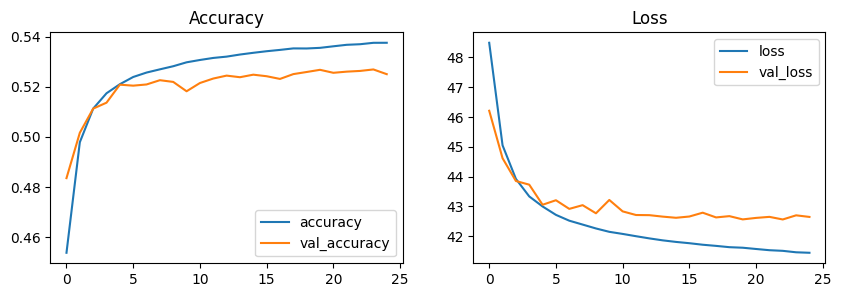

In [22]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

training_log["accuracy"].plot(ax=axes[0])
training_log["val_accuracy"].plot(ax=axes[0])
training_log["loss"].plot(ax=axes[1])
training_log["val_loss"].plot(ax=axes[1])
axes[0].legend()
axes[1].legend()
axes[0].set_title("Accuracy")
axes[1].set_title("Loss")

From the above figure we see that the model is yet to overfit on training set, so the model is good to use.

In [23]:
pred_result = model.predict([np.array(X_test)[:, :300], np.array(X_test)[:, 300:]], batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

3219/3219 [==============================] - 3s 764us/step


In [24]:
result_df = pd.DataFrame()
result_df["id"] = test_df["id"]
result_df["emotion"] = pred_result
result_df.to_csv("./2branch_ep25.csv", index=False)